In [1]:
from itertools import product

import numpy as np
from scipy.linalg import inv
from scipy.ndimage import rotate
from matplotlib import pyplot as plt

import _lddmm_utilities

from _lddmm import generate_position_field
from _lddmm import _transform_image
from _lddmm import lddmm_transform_image
from _lddmm import lddmm_register
from _lddmm import _transform_points
from _lddmm import lddmm_transform_points

In [5]:
def _test_lddmm_register(rtol=0, atol=1-1e-9, **lddmm_register_kwargs):
        """A helper method for this class to verify registrations once they are computed."""

        reg_output = lddmm_register(**lddmm_register_kwargs)

        template = lddmm_register_kwargs['template']
        target = lddmm_register_kwargs['target']
        template_resolution = lddmm_register_kwargs['template_resolution'] if 'template_resolution' in lddmm_register_kwargs.keys() else 1
        target_resolution = lddmm_register_kwargs['target_resolution'] if 'target_resolution' in lddmm_register_kwargs.keys() else 1

        deformed_target = lddmm_transform_image(
            subject=target, 
            subject_resolution=target_resolution, 
            deform_to='template', 
            **reg_output,
        )

        deformed_template = lddmm_transform_image(
            subject=template, 
            subject_resolution=template_resolution, 
            deform_to='target', 
            **reg_output,
        )
        
        return deformed_target, deformed_template

Text(0.5, 1.0, 'deformed_template')

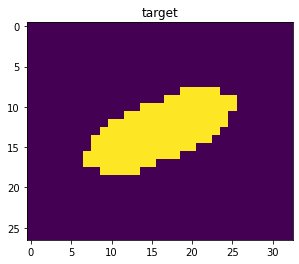

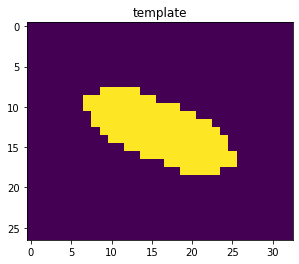

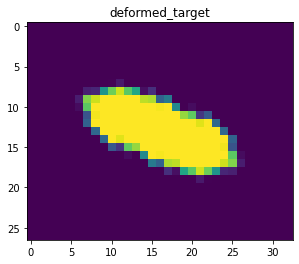

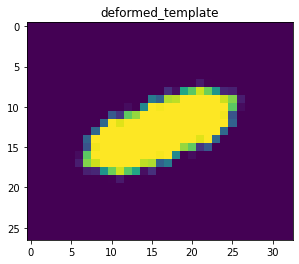

In [12]:
#test_rigid_affine_only_ellipsoid_to_ellipsoid_registration

template = np.array([[(col-14)**2/10**2 + (row-8)**2/4**2 <= 1 for col in range(29)] for row in range(17)], int)
# template and target are opposite rotations of an unrotated ellipsoid for symmetry.
target = rotate(template, 45/2)
template = rotate(template, -45/2)

plt.imshow(target)
plt.title("target")
plt.figure()
plt.imshow(template)
plt.title("template")

lddmm_register_kwargs = dict(
    template=template,
    target=target,
    num_iterations=50,
    num_affine_only_iterations=50,
    num_rigid_affine_iterations=50,
)

deformed_target, deformed_template = _test_lddmm_register(**lddmm_register_kwargs)

plt.figure()
plt.imshow(deformed_target)
plt.title("deformed_target")

plt.figure()
plt.imshow(deformed_template)
plt.title("deformed_template")

Text(0.5, 1.0, 'deformed_template')

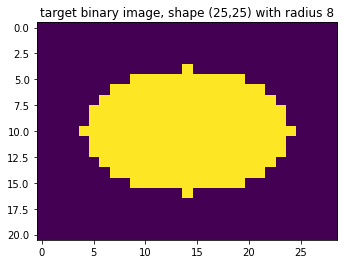

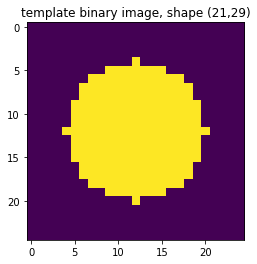

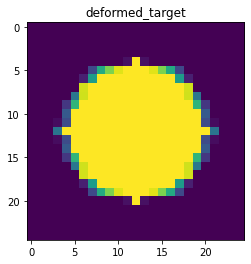

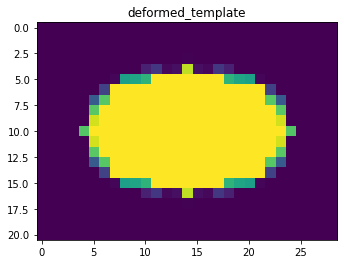

In [15]:
# template has shape (25, 25) and radius 8.
template = np.array([[(col-12)**2 + (row-12)**2 <= 8**2 for col in range(25)] for row in range(25)], int)
# target has shape (21, 29) and semi-radii 6 and 10.
target = np.array([[(col-14)**2/10**2 + (row-10)**2/6**2 <= 1 for col in range(29)] for row in range(21)], int)

plt.imshow(target)
plt.title("target binary image, shape (25,25) with radius 8")
plt.figure()
plt.imshow(template)
plt.title("template binary image, shape (21,29)")

lddmm_register_kwargs = dict(
    template=template,
    target=target,
    num_iterations=150,
    num_affine_only_iterations=0,
    affine_stepsize=0,
    deformative_stepsize=0.5,
)
        
deformed_target, deformed_template = _test_lddmm_register(**lddmm_register_kwargs)
plt.figure()
plt.imshow(deformed_target)
plt.title("deformed_target")

plt.figure()
plt.imshow(deformed_template)
plt.title("deformed_template")